# Pymaceuticals Inc.
---

### Analysis

- By using final tumor volume (mm3) as a metric to analyze the efficacy of a drug, we can see that Capomulin and Ramicane were both more effective than Infubol or Ceftamin because the mice that were treated with those drugs had a smaller final tumor volume. 

- We can also see that there is a correlation between mouse weight and average tumor volume, as indicated by the positive relationship as well as the correlation coefficient that was calculated. Since it was 0.84, we can assume that there is a correlation there.

- There may be more tests needed in order to determine if increased mouse weight causes increased tumor volume, or if this relationship is simply a correlation.
 

In [403]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [404]:
# Checking the number of mice.
mice_count = mouse_data["Mouse ID"].unique().size
mice_count

249

In [405]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupe = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dupe

array(['g989'], dtype=object)

In [406]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupe_id = mouse_data[mouse_data["Mouse ID"]=="g989"]
mice_dupe_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [407]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data[mouse_data["Mouse ID"].str.contains("g989")==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [408]:
# Check that the right amount of rows were dropped
#len(mouse_data.index)
#len(clean_data.index)

In [409]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].unique().size
clean_mice_count

248

## Summary Statistics

In [410]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_med = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_var = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_std = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem =  clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                             "Median Tumor Volume": drug_med,
                             "Tumor Volume Variance": drug_var,
                             "Tumor Volume Std. Dev.": drug_std,
                             "Tumor Volume Std. Err.": drug_sem}) 
drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

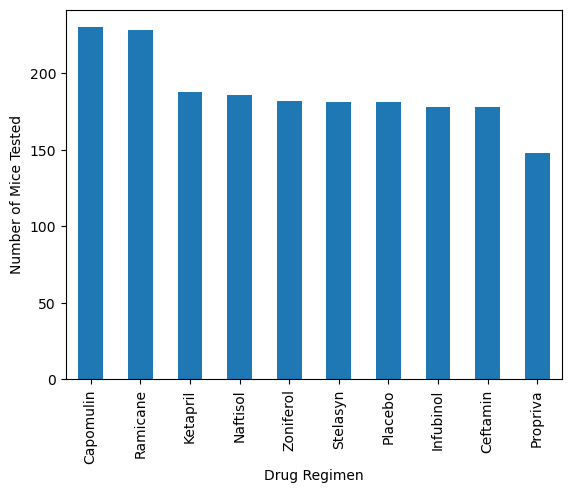

In [411]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.\

counts = clean_data["Drug Regimen"].value_counts()
b1 = counts.plot(kind="bar")

b1.set_xlabel("Drug Regimen")
b1.set_ylabel("Number of Mice Tested")


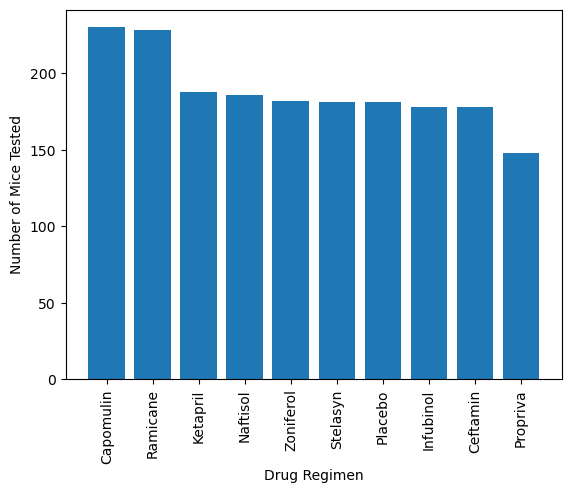

In [412]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(counts.index.values, counts.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


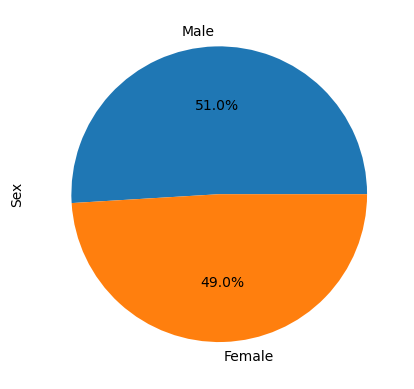

In [413]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = clean_data["Sex"].value_counts()
p1 = sex.plot(kind="pie", autopct='%1.1f%%')

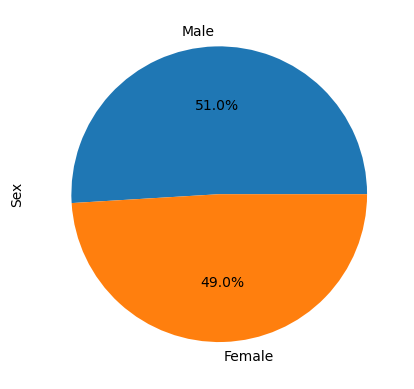

In [414]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sex, labels = sex.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [415]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | 
                           (clean_data["Drug Regimen"] == "Ramicane") |
                           (clean_data["Drug Regimen"] == "Infubinol") |
                           (clean_data["Drug Regimen"] == "Ceftamin")]


# Start by getting the last (greatest) timepoint for each mouse
drug_data = drug_data.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_data = pd.merge(drug_data, clean_data)
drug_data.value_counts()
drug_data



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [416]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
     # Determine outliers using upper and lower bounds
for i in drugs:
    tumor = drug_data.loc[drug_data["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor)
    quartiles = tumor.quantile([0.25,0.5,0.75]).round(2)
    lowerq = quartiles.loc[0.25].round(2)
    upperq = quartiles.loc[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"{i}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


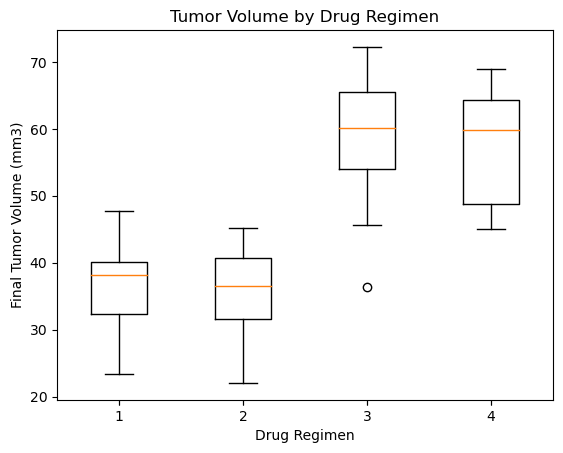

In [427]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig = plt.figure()
ticks = [1, 2, 3, 4]
plt.xticks(ticks, drugs)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

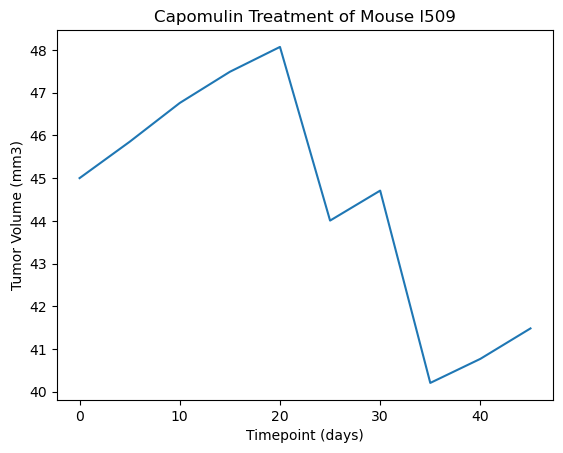

In [418]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_data.loc[clean_data["Mouse ID"] == "l509"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

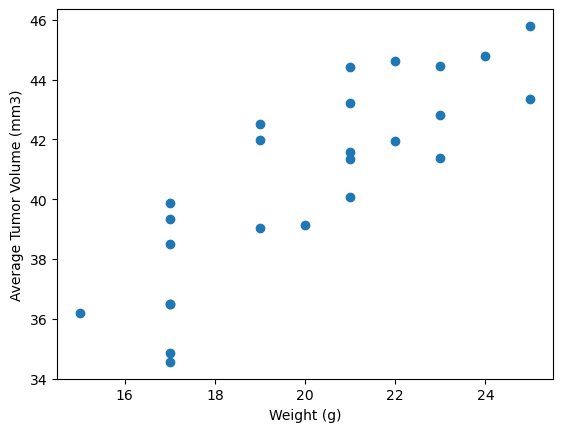

In [425]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
avg_cap = cap_data.groupby(["Mouse ID"]).mean()

plt.scatter(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


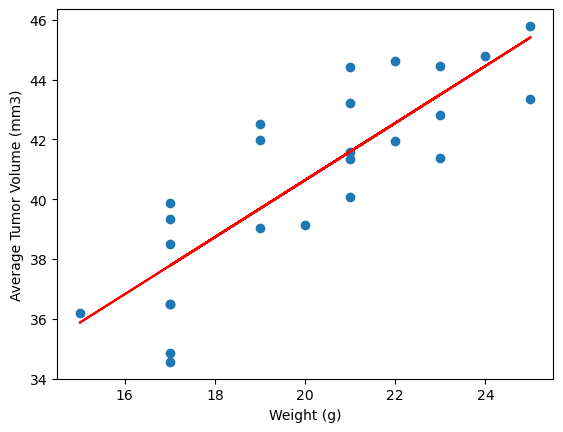

In [426]:
# Calculate the correlation coefficient and linear regression model 
avg_weight = avg_cap["Weight (g)"]
avg_tum = avg_cap["Tumor Volume (mm3)"]
cor = round(st.pearsonr(avg_weight, avg_tum)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {cor}")

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tum)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(avg_weight, avg_tum)
plt.plot(avg_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

